In [114]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from keras import Sequential 
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [88]:
#loading dataset
data = pd.read_csv('bankloan.csv')

In [89]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [90]:
#looking at dataframe size
print(data.size)

7982


In [91]:
list(data.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [92]:
#dropping Loan ID Column
df = data.drop('Loan_ID', axis = 1)

In [93]:
#looking for number of missing values per column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [94]:
#dropping all missing values
df = df.dropna()

#verification there are no missing values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [95]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

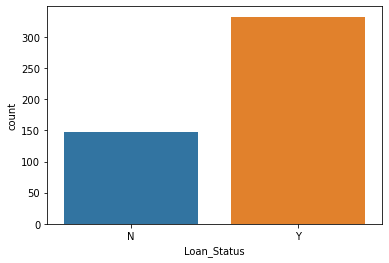

In [96]:
#Checking for distribution of Loan Status
sn.countplot('Loan_Status', data = df)

In [97]:
#Class Distibution  - Pre -SMOTE
y = df['Loan_Status']

print('Original Class Distribution:  \n')
print(y.value_counts())
print(y.value_counts(normalize = True))

Original Class Distribution:  

Loan_Status
Y    332
N    148
Name: count, dtype: int64
Loan_Status
Y    0.691667
N    0.308333
Name: proportion, dtype: float64


In [98]:
#identifying Y (target variable) & X (Explanatory) variables, pre OneHotEncoding via Dummies
pre_y = df.Loan_Status
pre_x = df.drop('Loan_Status', axis = 1)

#converting into get_dummies
dm_x = pd.get_dummies(pre_x)

#converting y into a dictionary, where Yes is 1, and No is 0
dm_y = pre_y.map(dict(Y=1, N=0))

In [99]:
dm_y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [100]:
#applying smote to dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 777)
X1, y = smote.fit_sample(dm_x, dm_y)

In [101]:
#Class Distribution Post-Smote
print('Post-SMOTE Class Distribution:  \n')
print(y.value_counts())
print(y.value_counts(normalize = True))

Post-SMOTE Class Distribution:  

Loan_Status
0    332
1    332
Name: count, dtype: int64
Loan_Status
0    0.5
1    0.5
Name: proportion, dtype: float64


In [102]:
#applying MinMaxScaler, to Explanatory Variable
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [103]:
#splitting Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=123)

In [104]:
#Creating Sequential Model
model = Sequential()
model.add(Dense(200, activation = 'relu', kernel_initializer = 'random_normal', input_dim = X_test.shape[1]))
model.add(Dense(400, activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(4, activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'random_normal'))

In [105]:
#compiling model
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [106]:
#fitting the model
model.fit(X_train, y_train, batch_size = 20, epochs = 50, verbose = 0)

In [107]:
eval_model = model.evaluate(X_train, y_train)

16/16 [==============================] - 0s 2ms/step - loss: 0.2708 - accuracy: 0.8855


In [108]:
#creating prediction set
preds = model.predict(X_test)
preds= (preds>0.5)

6/6 [==============================] - 0s 2ms/step


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

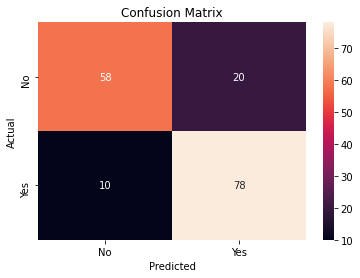

In [117]:
#Confusion Matrix
cm = confusion_matrix(y_test, preds)

ax = plt.subplot()
sn.heatmap(cm, annot = True, ax = ax)

#labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [118]:
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        78
           1       0.80      0.89      0.84        88

    accuracy                           0.82       166
   macro avg       0.82      0.81      0.82       166
weighted avg       0.82      0.82      0.82       166



### Interpretation of classification report

**Precision**: Out of all the customer that the model predicted would get approved, **80%** actually did.

**Recall**: Out of all the customers that actually did get approved for bank loan, the model only predicted this outcome correctly **89%** of those customers

**f1 score**: with an f1 score of **0.84** out of **1.00** , the model did a great job of predicting Bank Loan Approval

## Creating Machine Learning Model for Deployment and Implementation

In [120]:
#Pickling the Model
import pickle
import joblib

filename = 'loan_model.pkl'
joblib.dump(model, filename)

['loan_model.pkl']